https://pbpython.com/effective-matplotlib.html  
Tutorial: Advanced matplotlib, from the library's author John Hunter https://youtu.be/DNRJwENqEUY  
Anatomy of matplotlib | SciPy 2015 Tutorial | Benjamin Root and Joe Kington : https://youtu.be/MKucn8NtVeI  
Anatomy of matplotlib | SciPy 2018 Tutorial | Benjamin Root and Joe Kington : https://youtu.be/6gdNUDs6QPc  
https://dev.to/skotaro/artist-in-matplotlib---something-i-wanted-to-know-before-spending-tremendous-hours-on-googling-how-tos--31oo

In [47]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

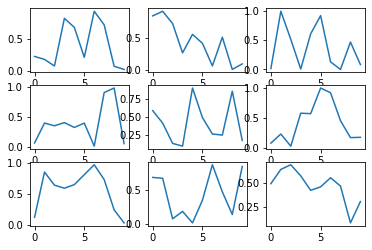

In [3]:
fig, axes = plt.subplots(3,3)
for ax in axes.flat: ax.plot(np.random.rand(10))

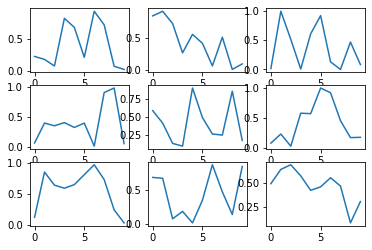

In [4]:
fig

In [5]:
fig.axes

[<AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>]

In [7]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

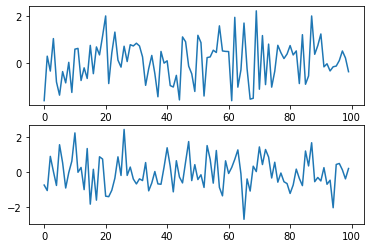

In [8]:
x, y = np.random.randn(2,100)
fig,axes = plt.subplots(2)
axes[0].plot(x)
axes[1].plot(y)

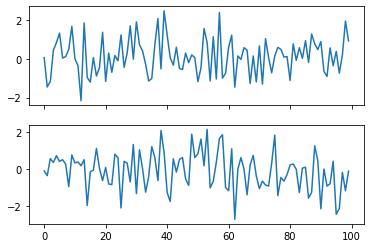

In [11]:
x, y = np.random.randn(2,100)
fig,axes = plt.subplots(2, sharex= True)
axes[0].plot(x)
axes[1].plot(y)

Axes is a 2D array.
The fig is the entire thing containing multiple axes.
We can to numpy style indexing on these Axes objects.

## Using sharex and sharey to turn off redundant labels

We do not want matplotlib to be intelligent. We want it to do what we tell it to do.

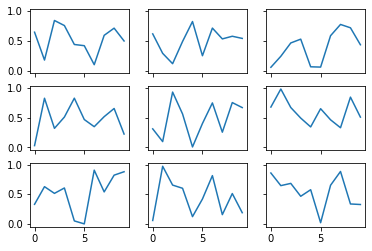

In [12]:
fig, axes = plt.subplots(3,3,
                         sharex = True, 
                         sharey = True)
for ax in axes.flat: ax.plot(np.random.rand(10))

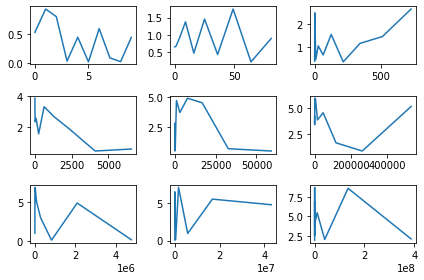

In [13]:
fig, axes = plt.subplots(3,3)
for i, ax in enumerate(axes.flat): 
    ax.plot(np.arange(10)**(i+1), (i+1)*np.random.rand(10))

fig.tight_layout()

### ax.locator_params(axis ="both", nbins = 4)
nbins = no. of ticks+1

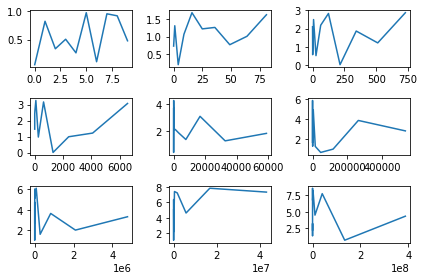

In [14]:
fig, axes = plt.subplots(3,3)
for i, ax in enumerate(axes.flat): 
    ax.plot(np.arange(10)**(i+1), (i+1)*np.random.rand(10))
    ax.locator_params(axis ="both", nbins = 4)

fig.tight_layout()

### matplotlib.ticker
ax.ticklabel_format()

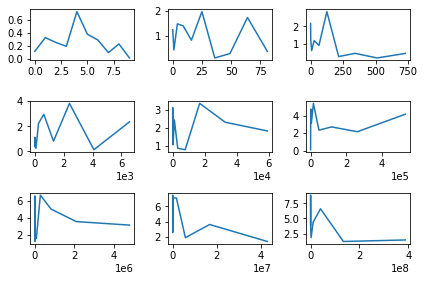

In [15]:
fig, axes = plt.subplots(3,3)
for i, ax in enumerate(axes.flat): 
    ax.plot(np.arange(10)**(i+1), (i+1)*np.random.rand(10))
    ax.locator_params(axis ="both", nbins = 4)
    ax.ticklabel_format(scilimits= (-3,3))

fig.tight_layout()

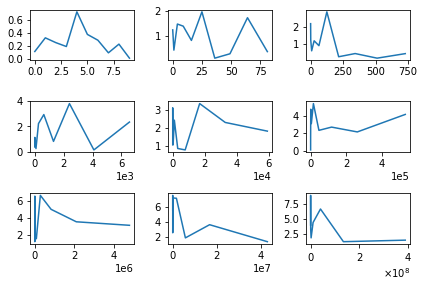

In [16]:
fmt = ax.xaxis.get_major_formatter()
fmt.format
fmt._useMathText = True
display(fig)

### Access to rcParams

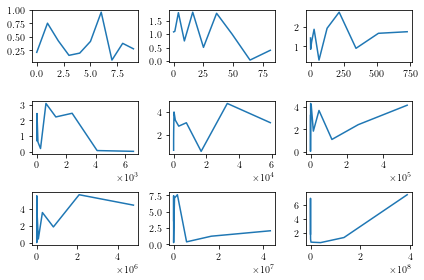

In [17]:
mpl.rcParams['text.usetex'] = True
# rcParams impact the global settings. Need to be careful

fig, axes = plt.subplots(3,3)
for i, ax in enumerate(axes.flat): 
    ax.plot(np.arange(10)**(i+1), (i+1)*np.random.rand(10))
    ax.locator_params(axis ="both", nbins = 4)
    ax.ticklabel_format(scilimits= (-3,3))

fig.tight_layout()

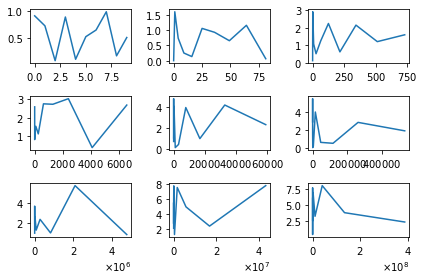

In [18]:
mpl.rcParams['text.usetex'] = False
# rcParams impact the global settings. Need to be careful
import matplotlib.ticker as ticker

fig, axes = plt.subplots(3,3)
for i, ax in enumerate(axes.flat): 
    ax.plot(np.arange(10)**(i+1), (i+1)*np.random.rand(10))
    ax.locator_params(axis ="both", nbins = 4) # axis can be 'x','y' or both
    ax.ticklabel_format(scilimits= (-3,3)) # 
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

fig.tight_layout()

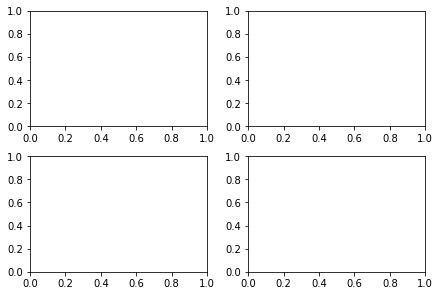

In [33]:
fig1, f1_axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True)

### subplot2grid()  

A helper function that is similar to subplot(), but uses 0-based indexing and let subplot to occupy multiple cells.
This function is not covered in this tutorial.

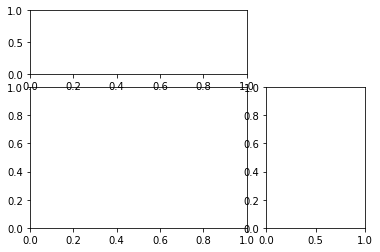

In [36]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3),(1,0),colspan = 2, rowspan =2)
ax2 = plt.subplot2grid((3,3),(0,0),colspan =2)
ax3 = plt.subplot2grid((3,3),(1,2),rowspan =2)

### GridSpec  
Specifies the geometry of the grid that a subplot will be placed. The number of rows and number of columns of the grid need to be set. Optionally, the subplot layout parameters (e.g., left, right, etc.) can be tuned.

In [38]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

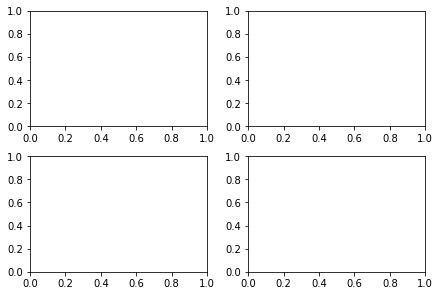

In [39]:
fig2 = plt.figure(constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[1, 0])
f2_ax4 = fig2.add_subplot(spec2[1, 1])

### mpl.cbook
ax.fill_between() function has the Argument "where" present

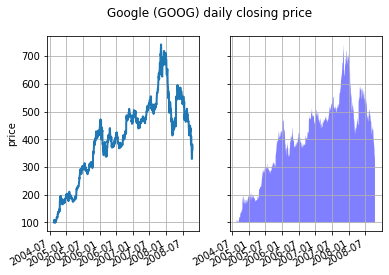

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cbook as cbook


# Fixing random state for reproducibility
np.random.seed(19680801)

# load up some sample financial data
r = (cbook.get_sample_data('goog.npz', np_load=True)['price_data']
     .view(np.recarray))
# create two subplots with the shared x and y axes
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)

pricemin = r.close.min()

ax1.plot(r.date, r.close, lw=2)
ax2.fill_between(r.date, pricemin, r.close, facecolor='blue', alpha=0.5)

for ax in ax1, ax2:
    ax.grid(True)

ax1.set_ylabel('price')
for label in ax2.get_yticklabels():
    label.set_visible(False)

fig.suptitle('Google (GOOG) daily closing price')
fig.autofmt_xdate()

In [61]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [62]:
plt.style.use("seaborn-whitegrid")

## Population of random walkers  
https://youtu.be/Z4hIrCoCGgo (John Hunter MPL workshop)

In [63]:
Nsteps, Nwalkers = 100,250
t = np.arange(Nsteps)

# an (Nsteps X Nwalkers) array of random walk steps
S1 = 0.002 + 0.01*np.random.randn(Nsteps, Nwalkers)
S2 = 0.004 + 0.02*np.random.randn(Nsteps, Nwalkers)

# an (Nsteps X Nwalkers) array of random walker positions
X1 = S1.cumsum(axis =0)
X2 = S2.cumsum(axis =0)

In [64]:
mu1 = X1.mean(axis =1)
sigma1 = X1.std(axis =1)
mu2 = X2.mean(axis =1)
sigma2 = X2.std(axis =1)


Text(0, 0.5, 'position')

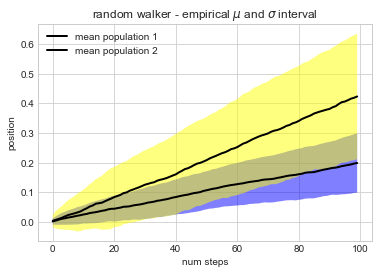

In [70]:
fig, ax = plt.subplots(1)
ax.plot(t,mu1,lw =2, label = "mean population 1", color = "black")
ax.plot(t,mu2,lw =2, label = "mean population 2", color = "black")

ax.fill_between(t, mu1+sigma1, mu1-sigma1, facecolor = "blue", alpha = 0.5)
ax.fill_between(t, mu2+sigma2, mu2-sigma2, facecolor = "yellow", alpha = 0.5)

ax.set_title("random walker - empirical $\mu$ and $\sigma$ interval")
ax.legend(loc = "upper left")
ax.set_xlabel("num steps")
ax.set_ylabel("position")
#ax.grid()

### mpl_recipes

## Placing text with boxes  
When decorating axes with text boxes, Two useful tricks are :
* Place the text in axes coordinates (check Transformation Tutorials) so that the text does not move with changes in x or y units
* Use the bbox property of text to surround the text with a Patch instance - the bbox keyword argument takes a dictionary with keys that are Patch properties  

#### Every Artist has a transform under the hood

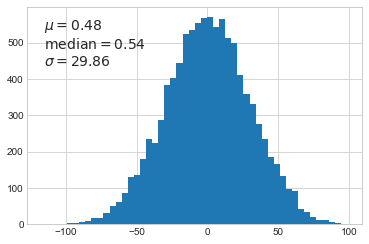

In [89]:
np.random.seed(1234)
fig,ax = plt.subplots(1)
x = 30*np.random.randn(10000)
mu = x.mean()
median = np.median(x)
sigma = x.std()
textstr = "$\mu = %.2f$\n$\mathrm{median}=%.2f$\n$\sigma =%.2f$"%(mu, median, sigma)

ax.hist(x,50);

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha =0.5)

ax.text(0.05,0.95, textstr, 
        transform = ax.transAxes, fontsize =14,
       verticalalignment = "top");

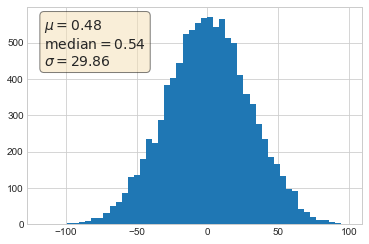

In [90]:
np.random.seed(1234)
fig,ax = plt.subplots(1)
x = 30*np.random.randn(10000)
mu = x.mean()
median = np.median(x)
sigma = x.std()
textstr = "$\mu = %.2f$\n$\mathrm{median}=%.2f$\n$\sigma =%.2f$"%(mu, median, sigma)

ax.hist(x,50);

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha =0.5)

ax.text(0.05,0.95, textstr, 
        transform = ax.transAxes, fontsize =14,
       verticalalignment = "top", bbox = props);

In [94]:
import matplotlib.patches as patch
patch.BoxStyle?

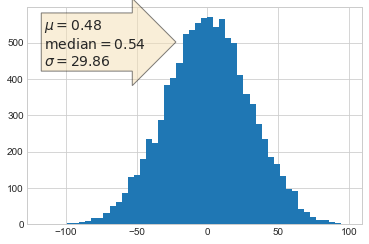

In [97]:
np.random.seed(1234)
fig,ax = plt.subplots(1)
x = 30*np.random.randn(10000)
mu = x.mean()
median = np.median(x)
sigma = x.std()
textstr = "$\mu = %.2f$\n$\mathrm{median}=%.2f$\n$\sigma =%.2f$"%(mu, median, sigma)

ax.hist(x,50);

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='rarrow', facecolor='wheat', alpha =0.5, pad =0.2)

ax.text(0.05,0.95, textstr, 
        transform = ax.transAxes, fontsize =14,
       verticalalignment = "top", bbox = props);

### Annotations

### Making Custom colour map